# Question 2 : Analysis 2
- Aim of this analysis was to find the no of articles which was published per year with regard to certain topics.

In [1]:
import requests,json,os
import re,datetime
import matplotlib.pyplot as mp


In [2]:
Terrorism=dict.fromkeys(range(2012,2017),0)    #Created multiple dictionaries for different topics with keys in the range of 2012 to 2016.
Police_Brut=dict.fromkeys(range(2012,2017),0)
Coll_Univ=dict.fromkeys(range(2012,2017),0)
Comp_Internet=dict.fromkeys(range(2012,2017),0)
Movies=dict.fromkeys(range(2012,2017),0)
Med_Health=dict.fromkeys(range(2012,2017),0)
Econ_Condt=dict.fromkeys(range(2012,2017),0)
Glob_Warm=dict.fromkeys(range(2012,2017),0)

In [3]:
for folder in range(2012,2017):
        jpath ='Archive/'+str(folder)
        
        for root, dirs, files in os.walk(jpath):
        
            for f in files:
                if f.endswith('.json'):
    
                    with open(os.path.join(root,f), 'r', encoding='utf-8', errors="ignore") as json_file:
         
                        artdata=json.load(json_file)
                   
                        match = re.search(r'\d{4}-\d{2}-\d{2}', artdata['pub_date'])
                        date = datetime.datetime.strptime(match.group(), '%Y-%m-%d').date()
                                    #Count for each topic was added to the corresponding dictionary according to the specific year.
                    for i in range(0,len(artdata['keywords'])):
                        if 'subject' in artdata['keywords'][i]['name']:
                            if 'Terrorism' in artdata['keywords'][i]['value']:
                                Terrorism[date.year]+=1
                            if 'Police Brutality, Misconduct and Shootings' in artdata['keywords'][i]['value']:
                                Police_Brut[date.year]+=1
                            if 'Colleges and Universities' in artdata['keywords'][i]['value']:
                                Coll_Univ[date.year]+=1
                            if 'Computers and the Internet' in artdata['keywords'][i]['value']:
                                Comp_Internet[date.year]+=1
                            if 'Movies' in artdata['keywords'][i]['value']:
                                Movies[date.year]+=1
                            if 'Medicine and Health' in artdata['keywords'][i]['value']:
                                Med_Health[date.year]+=1
                            if 'Economic Conditions and Trends' in artdata['keywords'][i]['value']:
                                Econ_Condt[date.year]+=1
                            if 'Global Warming' in artdata['keywords'][i]['value']:
                                Glob_Warm[date.year]+=1


In [4]:
x=[]                   # Created multiple lists for X-axis and Y-axis values.
ter=[]
mov=[]
pb=[]
cu=[]
ci=[]
mh=[]
ec=[]
gm=[]
for a in sorted(Terrorism):
    x.append(a)
    ter.append(Terrorism[a])
for a in sorted(Movies):
    mov.append(Movies[a])
for a in sorted(Police_Brut):
    pb.append(Police_Brut[a])
for a in sorted(Coll_Univ):
    cu.append(Coll_Univ[a])
for a in sorted(Comp_Internet):
    ci.append(Comp_Internet[a])
for a in sorted(Med_Health):
    mh.append(Med_Health[a])
for a in sorted(Glob_Warm):
    gm.append(Glob_Warm[a])
for a in sorted(Econ_Condt):
    ec.append(Econ_Condt[a])

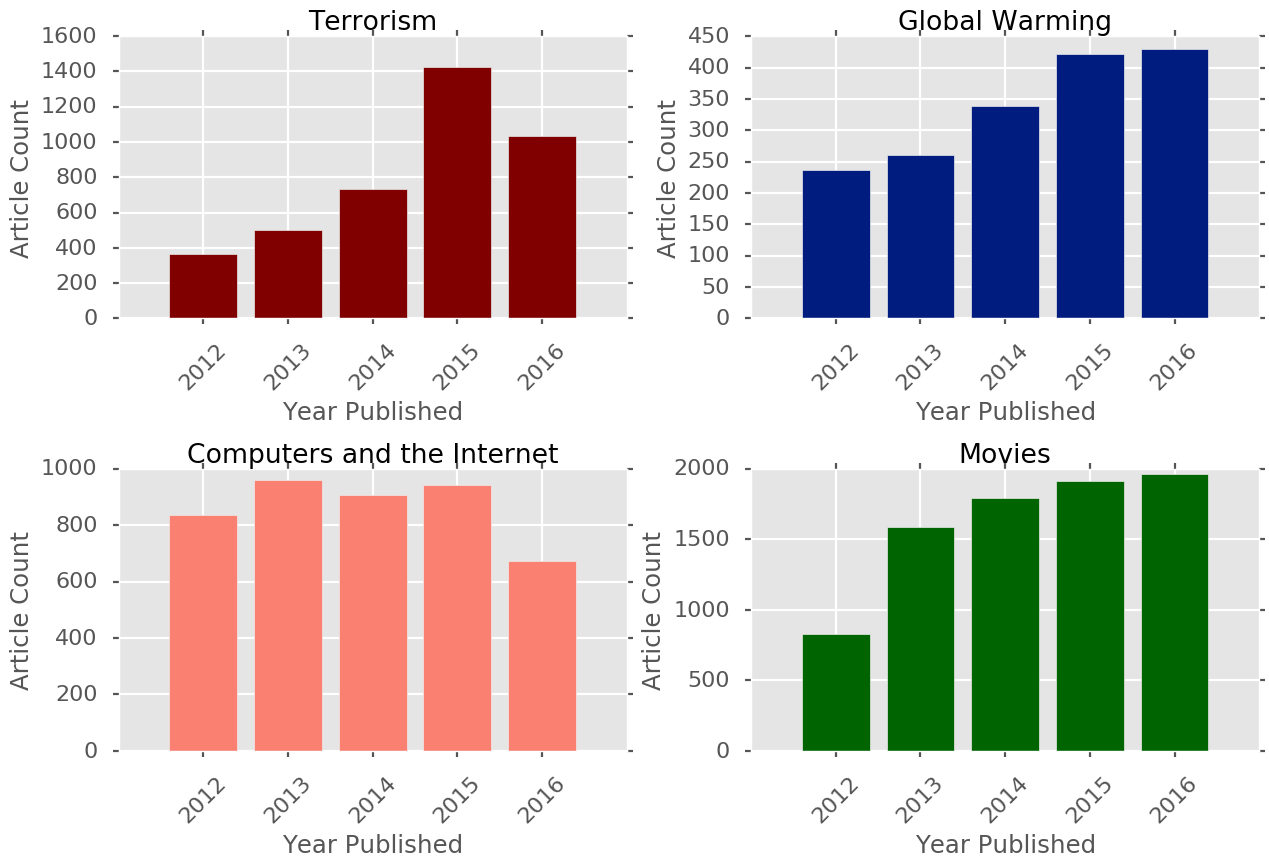

In [5]:
mp.style.use('ggplot')
mp.style.use('seaborn-dark-palette')
mp.style.use('seaborn-poster')

mp.subplot(221)
mp.bar(range(len(Terrorism)),ter,color='maroon',align='center')
mp.xticks(range(len(Terrorism)),x,rotation=45)
mp.title('Terrorism')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.subplot(224)
mp.bar(range(len(Movies)),mov,color='darkgreen',align='center')
mp.xticks(range(len(Movies)),x,rotation=45)
mp.title('Movies')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.subplot(223)
mp.bar(range(len(Comp_Internet)),ci,color='salmon',align='center')
mp.xticks(range(len(Comp_Internet)),x,rotation=45)
mp.title('Computers and the Internet')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.subplot(222)
mp.bar(range(len(Glob_Warm)),gm,align='center')
mp.xticks(range(len(Glob_Warm)),x,rotation=45)
mp.title('Global Warming')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.tight_layout()
mp.show()

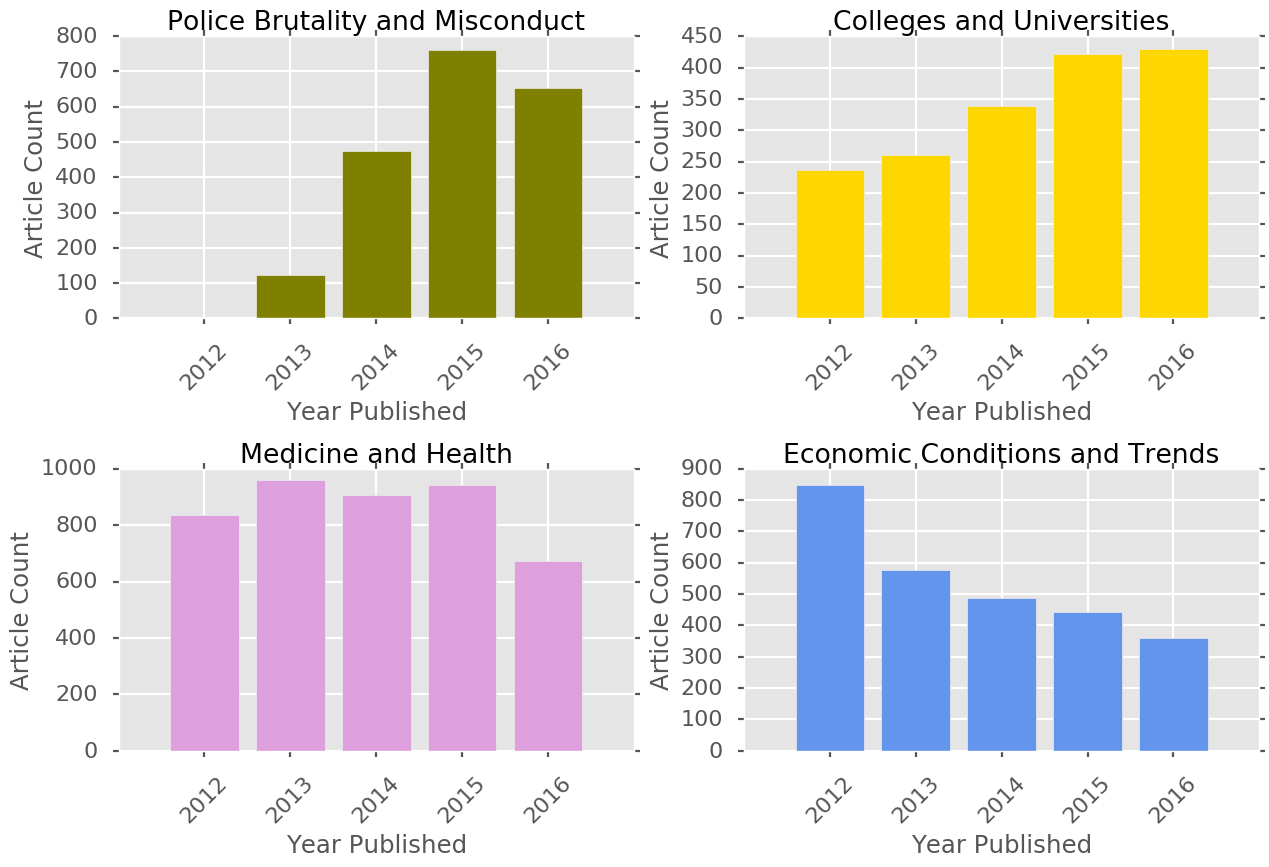

In [6]:
mp.style.use('ggplot')
mp.style.use('seaborn-dark-palette')
mp.style.use('seaborn-poster')

mp.subplot(221)
mp.bar(range(len(Police_Brut)),pb,color='olive',align='center')
mp.xticks(range(len(Police_Brut)),x,rotation=45)
mp.title('Police Brutality and Misconduct')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.subplot(224)
mp.bar(range(len(Econ_Condt)),ec,color='cornflowerblue',align='center')
mp.xticks(range(len(Econ_Condt)),x,rotation=45)
mp.title('Economic Conditions and Trends')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.subplot(223)
mp.bar(range(len(Med_Health)),ci,color='plum',align='center')
mp.xticks(range(len(Med_Health)),x,rotation=45)
mp.title('Medicine and Health')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.subplot(222)
mp.bar(range(len(Coll_Univ)),gm,color='gold',align='center')
mp.xticks(range(len(Coll_Univ)),x,rotation=45)
mp.title('Colleges and Universities')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.tight_layout()
mp.show()